In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('МКР2 Варіант 4 авіаперевезення.xlsx')
df = df.dropna(subset=['Verified'])
columns_to_keep = ['Rating', 'Seat Type', 'Country']
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)
df.tail()

,Rating,Country,Seat Type
324,6,United States,Economy Class
325,7,Netherlands,Business Class
326,1,United States,Economy Class
327,1,United States,Economy Class
328,3,Austria,Economy Class


In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df['Country Codes'] = df['Country'].astype('category').cat.codes
df['Seat Type Codes'] = df['Seat Type'].astype('category').cat.codes
df.tail()

,Rating,Country,Seat Type,Country Codes,Seat Type Codes
304,6,United States,Economy Class,39,1
305,7,Netherlands,Business Class,23,0
306,1,United States,Economy Class,39,1
307,1,United States,Economy Class,39,1
308,3,Austria,Economy Class,3,1


In [5]:
columns_to_drop = ['Country', 'Seat Type']
df.drop(columns=columns_to_drop, inplace=True)
df.tail()

,Rating,Country Codes,Seat Type Codes
304,6,39,1
305,7,23,0
306,1,39,1
307,1,39,1
308,3,3,1


In [6]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df)
scaled_data[0:3]

array([[-0.8196394 ,  1.14461405,  0.30413616],
       [-0.50773229,  1.14461405, -1.83172916],
       [-0.8196394 ,  0.86468865,  0.30413616]])

In [7]:
kmeans3 = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans3.fit(scaled_data)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [8]:
davies_bouldin_score(scaled_data, kmeans3.fit_predict(scaled_data))

1.1450767541057958

In [9]:
kmeans5 = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans5.fit(scaled_data)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [10]:
davies_bouldin_score(scaled_data, kmeans5.fit_predict(scaled_data))

0.802013964188434

In [11]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

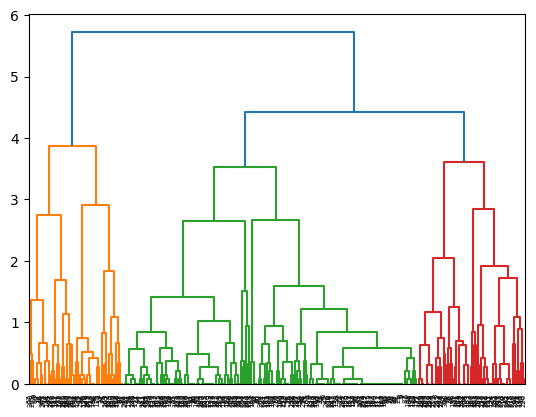

In [12]:
dendrogram(complete_clustering)
plt.show()

In [13]:
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=4, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=5, criterion='maxclust')))

1.0566235707513894
0.8957300681016731


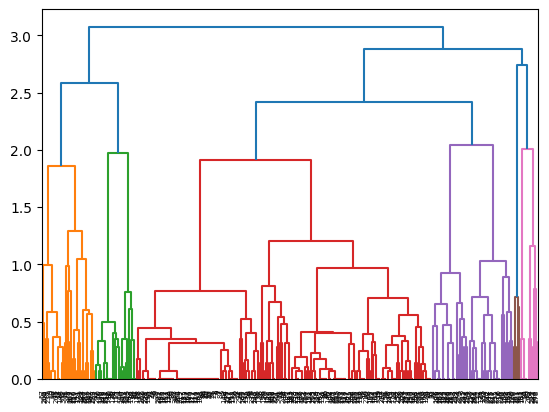

In [14]:
dendrogram(average_clustering)
plt.show()

In [15]:
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=2, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=3, criterion='maxclust')))

1.1905481193930212
1.2311534150061003


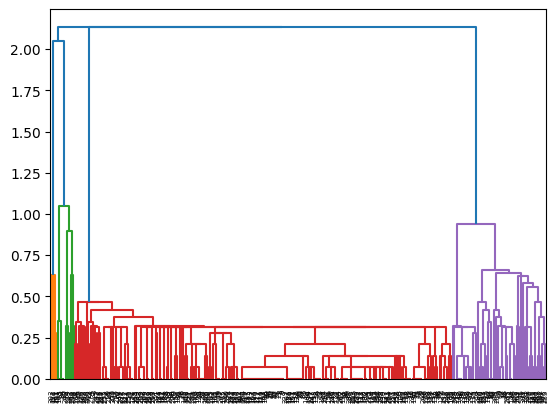

In [16]:
dendrogram(single_clustering)
plt.show()

In [17]:
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=3, criterion='maxclust')))

1.2311534150061003
